## Esame Metodi Numerici  4 Luglio 2024 - Turno II Ore 12,30

# Esercizio 1

Si considerino i due sistemi lineari:

     A  x = b 

    A1 x1 = b1

dove A, A1 sono le matrici dei coefficienti, b e b1 sono i termini noti, ed x ed x1 sono i vettori incogniti da determinare.
I dati di questi due sistemi lineari sono contenuti nel file **testII.mat**.


- Si risolva ciascuno dei sistemi lineari assegnati  utilizzando il metodo più adatto in base alle caratteristiche della matrice dei coefficienti, giustificando teoricamente le scelte effettuate.
                                      **punti 6**

Per il sistema A1 x1= b1, , aggiungere una perturbazione dello 0.1% sulla componente 1-esima del termine noto, e risolvere il sistema con termine noto perturbato. Calcolare quindi  l'errore relativo sulla soluzione e l'errore relativo sui dati e giustificare i risultati alla luce della teoria.
                                      **punti 2**


Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('testII')``

``A=dati["A"] ``

``A=A.astype(float)``

`` b=dati["b"] ``

`` b=b.astype(float)``

``A1=dati["A1"] ``

``A1=A1.astype(float)``

`` b1=dati["b1"] ``

`` b1=b1.astype(float)``

In [1]:
from scipy.io import loadmat

import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as spLin
from SolveTriangular import *

dati = loadmat('testII')
A=dati["A"] 
A=A.astype(float)
b=dati["b"]
b=b.astype(float)
A1=dati["A1"] 
A1=A1.astype(float)
b1=dati["b1"]
b1=b1.astype(float)

In [2]:
m,n = A.shape
if m==n:
    print("Matrice quadrata, dim: ", m)
else: 
    print("matrice non quadrata")

sp=np.count_nonzero(A)/(m*n)
print("Sparsità_ ", sp)

Matrice quadrata, dim:  10
Sparsità_  0.96


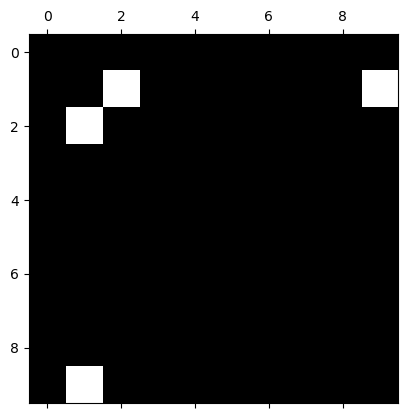

In [3]:
plt.spy(A)

In [4]:
flagS = A.T==A
if np.all(flagS==True):
    print("matrice simmetrica")
else: 
    print("Matrice non simmetrica")

matrice simmetrica


In [5]:
autovalori = np.linalg.eigvals(A)
if np.all(autovalori>0):
    print("def pos")
else:
    print("Non def pos")

def pos


In [6]:
condA=np.linalg.cond(A)
print("COndizionamento di A: ", condA)

COndizionamento di A:  12.81454459956794


In [7]:
#la matrice è simmetrica e definita positiva quindi uso la fattorizzazione di Choleski

L= spLin.cholesky(A, lower=True)
y=np.linalg.solve(L, b)
x=np.linalg.solve(L.T, y)

print("X:", x)

X: [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [8]:
m1,n1=A1.shape
if m1==n1:
    print("Matrice quadrata: ", m1)
else:
    print("Matrice non quadrata, m: ", m1, "n: ",n1)

Matrice non quadrata, m:  20 n:  15


In [9]:
condA1 = np.linalg.cond(A1)
print("Condizionamento A1: ", condA1)

Condizionamento A1:  5.4550631866614824e+16


In [10]:
rankA1= np.linalg.matrix_rank(A1)
if rankA1 == min(A.shape):
    print("matrice è a a rango massimo")
else:
    print("Non è a ragno massimo")

Non è a ragno massimo


In [11]:
#Essendo la matrice molot mal condizionata e non a rango massimo uso il metodo SVDLS
def SVDLS(A,b):
    m,n=A.shape  #numero di righe e  numero di colonne di A
    U,s,VT=spLin.svd(A)  
    
    V=VT.T
    thresh=np.spacing(1)*m*s[0] ##Calcolo del rango della matrice, numero dei valori singolari maggiori di una soglia
    k=np.count_nonzero(s>thresh)
    
    d=U.T@b 
    d1=d[:k].reshape(k,1) 
    s1=s[:k].reshape(k,1)
    
    c=d1/s1 
    x=V[:,:k]@c 
    residuo=np.linalg.norm(d[k:])**2 
    return x,residuo

X:  [[0.5210993 ]
 [1.25827182]
 [1.27889527]
 [0.46087355]
 [0.89024294]
 [1.04762977]
 [0.29616227]
 [0.59585228]
 [1.13383321]
 [0.94430646]
 [1.32127485]
 [0.97301581]
 [0.15568769]
 [0.79644108]
 [1.09968922]]


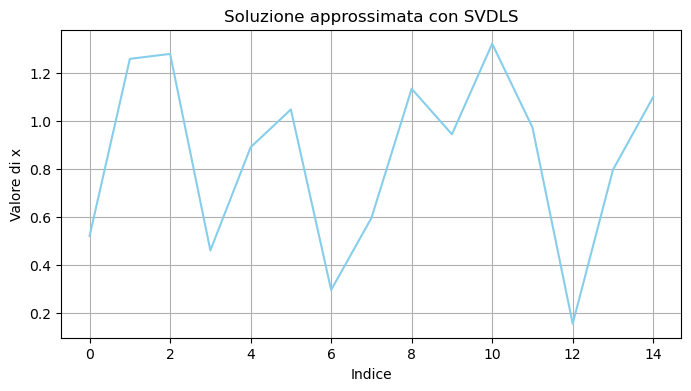

In [19]:
xS, residuoS = SVDLS(A1, b1)
print("X: ", xS)
plt.figure(figsize=(8,4))
plt.plot(range(len(xS)), xS.flatten(), color='skyblue')
plt.title("Soluzione approssimata con SVDLS")
plt.xlabel("Indice")
plt.ylabel("Valore di x")
plt.grid(True)
plt.show()

X:  [[0.57871682]
 [1.35873859]
 [1.3606347 ]
 [0.5246878 ]
 [0.90527175]
 [1.03716026]
 [0.27962787]
 [0.57025909]
 [1.1336439 ]
 [0.9538572 ]
 [1.14640487]
 [0.96020512]
 [0.10594365]
 [0.74210628]
 [1.06711618]]


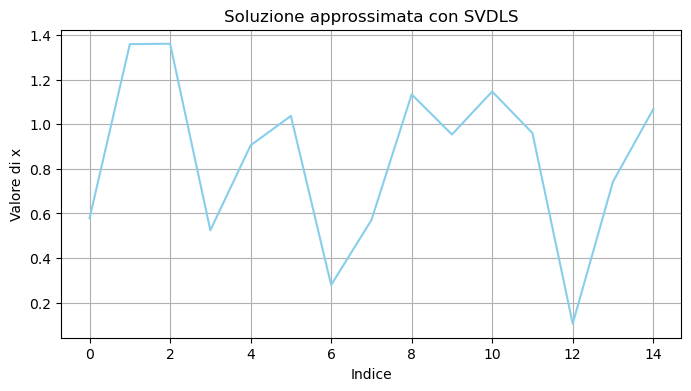

In [24]:
b1_per= b1.copy()
b1_per[1]=b1_per[1]+0.1
x_per, residuo_per= SVDLS(A1, b1_per)
print("X: ", x_per)
plt.figure(figsize=(8,4))
plt.plot(range(len(x_per)), x_per.flatten(), color='skyblue')
plt.title("Soluzione approssimata con SVDLS")
plt.xlabel("Indice")
plt.ylabel("Valore di x")
plt.grid(True)
plt.show()

In [23]:
err_rel_dati=np.linalg.norm(b1_per - b1)/np.linalg.norm(b1)
err_rel_sol= np.linalg.norm(x_per-xS)/np.linalg.norm(xS)

print("Errore relativo sui dati: ", err_rel_dati)
print("Errore relativo sulla soluzione: ", err_rel_sol)

Errore relativo sui dati:  0.005099162520487184
Errore relativo sulla soluzione:  0.033523822474332256


- Dato il sistema lineare 
A3 x3 = b3
dove 

A3=np.array([[8.0,0,1,1],[0,0.8,1,0],[1,1,2,0],[1,0,0.0,2.0]])
b3= np.array([10.0, 1.8,  4.0, 3.0])

- Verificare senza calcolare il raggio spettrale della matrice di iterazione che il metodo di Gauss-Seidel converge, richiamando il teorema che garantisce la convergenza di Gauss-Seidel per classi particolari di 
matrici     **punti[1]**.
- Implementare il metodo di Gauss-Seidel  e risolvere il sistema lineare A3 x3= b3  **punti[3]**.

Totale **Punti 12**

In [26]:
A3=np.array([[8.0,0,1,1],[0,0.8,1,0],[1,1,2,0],[1,0,0.0,2.0]]) 
b3= np.array([10.0, 1.8, 4.0, 3.0])
#per fare in modo che il metodo di GaussSeidel converga ci sono due possibilità o calcolare il raggio sprettrale e controllare che sia minore di uno altrimenti
#un teorema afferma che se la matrice è diagonale strettamente dominante allora il metodo converge, andiamo quindi a controllare che la matrice sia di questo tipo


def is_strictly_diagonally_dominant(A):

    n, m = A.shape
    if n != m:
        raise ValueError("La matrice deve essere quadrata")

    for i in range(n):
        diag = abs(A[i, i])
        off_diag_sum = np.sum(np.abs(A[i, :])) - diag
        if diag <= off_diag_sum:
            return False  # almeno una riga non soddisfa la condizione
    return True

if is_strictly_diagonally_dominant(A3):
    print("Gauss-Seidel: converge")
else:
    print("non converge")

non converge


In [32]:
def gauss_seidel(A,b,x0,toll,it_max):
    errore=1000
    d=np.diag(A)
    D=np.diag(d)
    E=np.tril(A,-1)
    F=np.triu(A,1)
    M=D+E
    N=-F 
    T=np.linalg.inv(M)@N
    autovalori=np.linalg.eigvals(T)
    raggiospettrale=np.max(np.abs(autovalori))
    print("raggio spettrale Gauss-Seidel ",raggiospettrale)
    it=0
    er_vet=[]
    while it<it_max and errore>=toll:
        x,flag=Lsolve(M, b-F@x0)
        errore=np.linalg.norm(x-x0)/np.linalg.norm(x) 
        er_vet.append(errore)
        x0=x.copy()
        it=it+1
    return x,it,er_vet

In [33]:
x0=np.zeros_like(b3)
toll=1e-6
it_max=100
xG, itG, er_vetG = gauss_seidel(A3,b3,x0, toll, it_max)

raggio spettrale Gauss-Seidel  0.6936887195995491


ValueError: could not broadcast input array from shape (4,) into shape (1,)

## Esercizio 2

Per ogni $k \in N$ l'equazione di II grado $x^2+(4^{2k}-2^{-2k})x-4^{2k}2^{-2k}=0 $ ha come soluzioni esatte $x_1=-4^{2k}$,$x_2=2^{-2k}$,

Scrivere lo script python in cui
- si implementa la formula risolutiva delle equazioni di II grado per calcolare le  due soluzioni per $k$ che  assume valori interi tra 4 e 12;  [**Punti 2**]
- per entrambe le soluzioni, si calcola l'errore relativo commesso al variare di k che assume valori interi tra 4 e 12;   [**Punti 1**]
- si rappresentano in un grafico gli andamenti dei due errori relativi calcolati nel punto precedente; [**Punti 1**]
- osservando i grafici ottenuti, si dica se le formule utilizzate per calcolare le due soluzioni hanno dato luogo ad algoritmi stabili, motivando opportunamente la risposta alla luce della teoria.   [**Punti 4**]

- proporre ed implementare un algoritmo alternativo stabile per il calcolo della soluzione per cui la formula risolutiva classica si è dimostrata non essere stabile. [**Punti 2**]

- Ricavavare la formula che quantifica l'indice di condizionamento del problema di valutare una funzione $f:R \rightarrow R$ in un punto $x \in R$ [**punti 3**]

## Domande Intelligenza Artificiale
**NB: Ogni risposta esatta:  +0.5 punti, ogni risposta errata: -0.5 punti. La mancanza di risposta:  0 punti**

Domande a risposta multipla

**1** 
Quale delle seguenti affermazioni è FALSA riguardo alle reti MLP (Multilayer Perceptron)?

- Le reti MLP sono composte da uno o più strati nascosti di neuroni.
- Le reti MLP utilizzano una funzione di attivazione non lineare per introdurre una non linearità nel modello.

- Le reti MLP sono in grado di apprendere solo relazioni lineari tra i dati di input e output.

- Le reti MLP possono essere utilizzate per risolvere una vasta gamma di problemi di apprendimento automatico, tra cui la classificazione e la regressione.

**2.**  Quale delle seguenti affermazioni è la definizione CORRETTA di learning rate nel training di una rete neurale?

A) Il numero di volte in cui l'intero set di dati viene utilizzato durante il training.

B) Un parametro che controlla la velocità con cui i pesi della rete vengono aggiornati durante il training.

C) Il numero di neuroni presenti nello strato di output della rete.

D) La funzione di attivazione utilizzata dai neuroni della rete.ressione

**3.**  
Quale tra le seguenti affermazioni descrive meglio il compito della funzione di attivazione nel training di una rete neurale?

- Trasformare i dati di input in un formato compatibile con la rete neurale

- Introdurre una non linearità nel flusso di informazioni della rete

- Calcolare l'errore tra l'output previsto e quello effettivo

- Aggiornare i pesi delle connessioni tra i neuroni softmax


**4.** Quale delle seguenti definizioni descrive meglio un'epoca nel training di una rete neurale?
- Il numero di volte in cui viene aggiornato un singolo peso nella rete
- Il tempo impiegato per completare un ciclo di forward pass e backward propagation
- Il numero di volte in cui l'intero set di dati di training viene esposto alla rete
- Una misura della complessità del modello di rete neurale


**5.** Quale tra le seguenti affermazioni è FALSA riguardo alla suddivisione del dataset in un contesto di machine learning?

- La suddivisione del dataset in set di training, validation e test è fondamentale per valutare correttamente le prestazioni di un modello di machine learning.
- Il set di training viene utilizzato per addestrare il modello sui dati.
- Il set di validation viene utilizzato per trovare le etichette dei dati di input
- Il set di test viene utilizzato per valutare le prestazioni finali del modello su dati che non sono stati utilizzati per il training o la validation.


**Domande aperte**

**6. Descrivi in cosa consiste la fase di forward-propagation e back-propagation nell'ambito del training di una rete neurale, soffermandoti sull'importanza dell'algoritmo di backpropagation** per il calcolo delle derivate parziali della funzione costo rispetto ai pesi di tutti i layer **[punti 1.5]**

**7** Ricavare la formula di aggiornamento dei pesi mediante algoritmo di backpropagation nel caso di una rete MLP formata da un nodo di input, 2 layer nascosti ciascuno dei quali costituito da un solo neurone ed un nodo di output.   **[punti: 3]**